In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [6]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

# Top 5 rows

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.shape

(246, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**We have to clean the dataset**

In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

**Here we can see that there is less amount of null values and we need to look out for other stuffs to get the values**

In [23]:
df[df.isnull().sum(axis=1)>1]
# so I looked out for the null value in rows and found out that we have 122 index with more than 1 nulls 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df['month'].value_counts()
# here we can see that month name is repeated once 

07       62
08       62
06       60
09       60
month     1
Name: month, dtype: int64

In [19]:
df['year'].value_counts()
# similarly here we can see that there is year name repeated.

2012    244
year      1
Name: year, dtype: int64

In [28]:
df[(df['year'].isin(['year'])) & (df['month'].isin(['month']))]
#so then we get the row value which satisfy the above 2 condition

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


**So we drop the index and reset the index**

In [29]:
df.drop([122,123],inplace=True)
# It will give index gap so we reset the index 
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [30]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Here we will convert the Region into 2 halves first half into Bejaia which carries 1 and Sidi which carries 0 with new column named Region**

In [32]:
df['Region']=1
for i in range(len(df)):
    if i>=122:
        df['Region'][i]=0 
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [33]:
df['Region'].value_counts()

1    122
0    122
Name: Region, dtype: int64

In [36]:
df.columns
#Here we can see that we have there is some gap between them. 

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [37]:
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [39]:
df['Classes'].unique()
#similarly there is some gap between 

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [40]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [41]:
df['Classes'].value_counts()
#therefore we replace the null with fire; as fire is repeated more times(mode)

fire        137
not fire    106
Name: Classes, dtype: int64

In [52]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

**Here we can see this there is no null values**

# Conversion of DataTypes

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [56]:
df=df.astype({'day':'int','month':'int','year':'int','Temperature':'int','RH':'int','Ws':'int','Rain':'float','FFMC':'float',
             'DMC':'float','ISI':'float','BUI':'float','Region':'int','DC':'float','FWI':'float'})

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [63]:
df.describe(include=[np.int,np.float])

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Seggregation of data set into numeric and Categorical 

In [66]:
df_num=df.select_dtypes(include=[np.int,np.float])
df_cat=df.select_dtypes(include=[np.object])

In [67]:
df_num

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [68]:
df_cat

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
239,fire
240,not fire
241,not fire
242,not fire


# Univariant Analysis

1. The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix 'uni' means 'one' . 
2. The purpose of univariate analysis is to understand the distribution of values for a single variable.

# Numerical Feature Analysis 

In [70]:
df_num.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

**ScatterPlot**
1. This plots showcase observations/values of the same variable corresponding to the index/observation number. 

In [73]:
df.index

RangeIndex(start=0, stop=244, step=1)

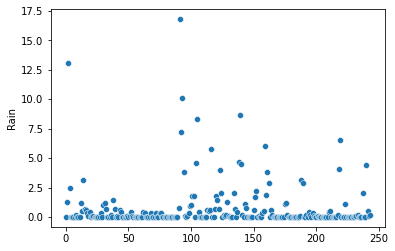

In [80]:
sns.scatterplot(data=df_num,y='Rain',x=df.index)
plt.show()

observastion:
1. we can see that there is spread of rain pattern. 
2. Therefore we can see that highest rainfall is around 17.5 and min is zero. 

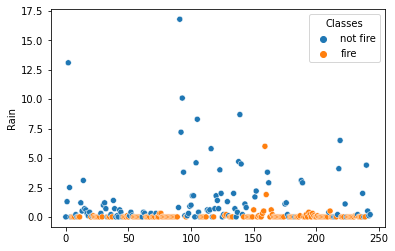

In [84]:
sns.scatterplot(x=df.index,y=df['Rain'],hue=df['Classes'])
plt.show()

observation:
1. See how rain is based on the fire and not fire 
2. not fire rain is high 
3. When rain is high is fire is low 

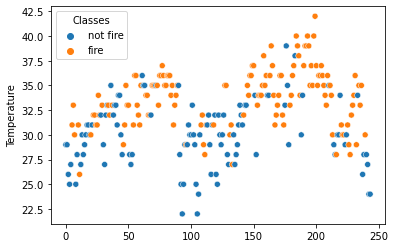

In [89]:
sns.scatterplot(x=df.index,y=df['Temperature'],hue=df['Classes'])
plt.show()

observation:
1. When there is Fire the Temperature have been increased and there is max temperature of about 42.5.
2. when there is no fire the temperature have not increased and we can see that there is max temperature of 40.
3. So the min value is very low for notfire it's around 21 and the min value for temp with fire is above 26.

<AxesSubplot:ylabel='Ws'>

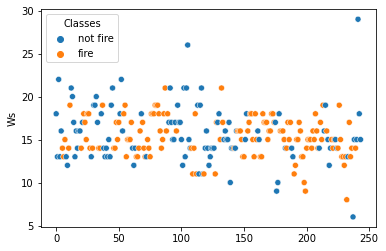

In [90]:
sns.scatterplot(x=df.index,y=df['Ws'],hue=df['Classes'])

observation :
1. we can see that how windspeed influences the fire and not fire. 
2. When the windspeed are higher we can see that there is no fire region present. 
3. Then we can tend to come to inclusion that the fire zone is around the average windspeed. 

<AxesSubplot:xlabel='month'>

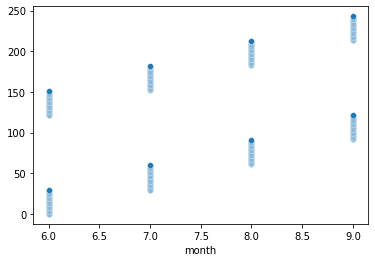

In [99]:
sns.scatterplot(y=df.index,x=df['month'])

In [109]:
df[(df['month']<=6)].index
# similar we can see this for other months too.

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29, 122, 123, 124, 125, 126, 127, 128, 129, 130,
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
            144, 145, 146, 147, 148, 149, 150, 151],
           dtype='int64')

observation:
1. from here we can see that major month are 6-9. 

<AxesSubplot:ylabel='FFMC'>

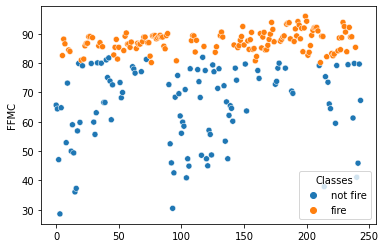

In [112]:
sns.scatterplot(df.index,df['FFMC'],hue=df['Classes'])

observation:
1. As the FFMC increase the fire is increases
2. When the FFMC is lower it tends to have the not-fire region.
3. Fire region is tend to start arounf FFMC having a range of about 80.

<AxesSubplot:ylabel='DMC'>

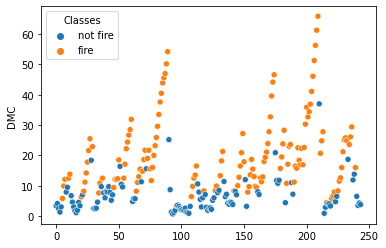

In [114]:
sns.scatterplot(df.index,df['DMC'],hue=df['Classes'])

observation:
1. As the DMC increases the fire classes are more than not fire region.
2. Then we have the not fire region which occurs around avg of 0-10 range of DMC

<AxesSubplot:ylabel='RH'>

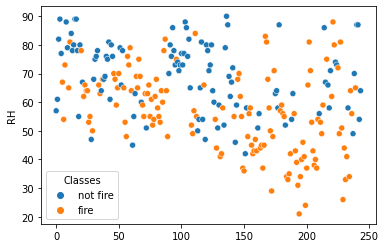

In [115]:
sns.scatterplot(df.index,df['RH'],hue=df['Classes'])

observation:
1. Lower the RH means more cause of fire region 
2. High RH means not_fire region.

# HistoGram

A histogram groups value into ranges and the height of a bar shows how many values fals in that range.

In [134]:
df_num.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


<AxesSubplot:xlabel='Temperature', ylabel='Count'>

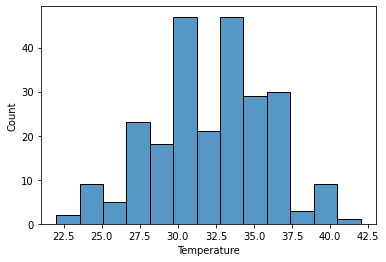

In [154]:
sns.histplot(data=df,x=df_num['Temperature'])

observation:
1. Here we can see that most of the temperature ranges where around 27 to 36 

<AxesSubplot:xlabel='day', ylabel='Count'>

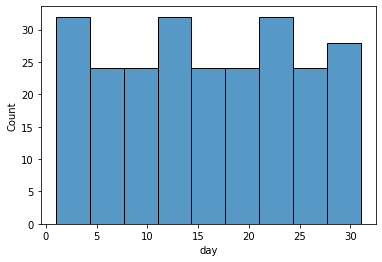

In [146]:
sns.histplot(data=df,x=df_num['day'])

observation:
1. Here we can see here is the day count and all are in the same range; But some days are topped among others.

<AxesSubplot:xlabel='month', ylabel='Count'>

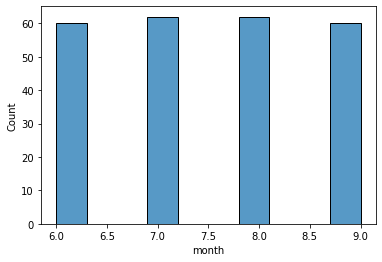

In [155]:
sns.histplot(data=df,x=df_num['month'])

observation:
1. Here we can see here is the month count and all are in the same range;

<AxesSubplot:xlabel='year', ylabel='Count'>

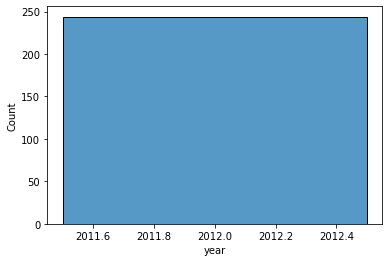

In [148]:
sns.histplot(data=df,x=df_num['year'])

observation:
1. Here we can see here is Year count and all are have in the same range

<AxesSubplot:xlabel='RH', ylabel='Count'>

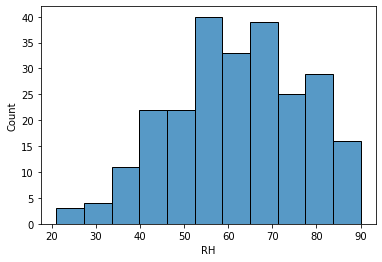

In [149]:
sns.histplot(data=df,x=df_num['RH'])

observation:
1. Here we can see the RH count and therefore we can infer that most occurence is around 55-75.

<AxesSubplot:xlabel='Ws', ylabel='Count'>

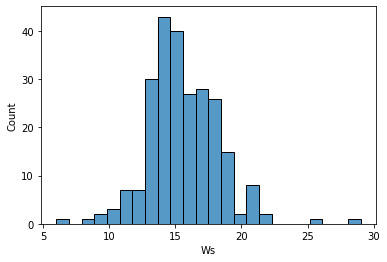

In [150]:
sns.histplot(data=df,x=df_num['Ws'])

observation:
1. Here we can see here is the WS count. Mostly it occured more than 11-15 and gets reduced.

<AxesSubplot:xlabel='Rain', ylabel='Count'>

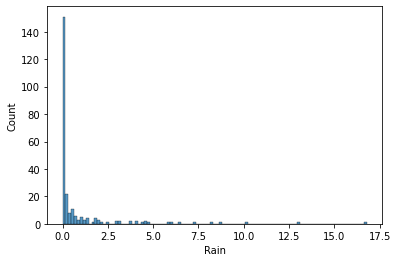

In [151]:
sns.histplot(data=df,x=df_num['Rain'])

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

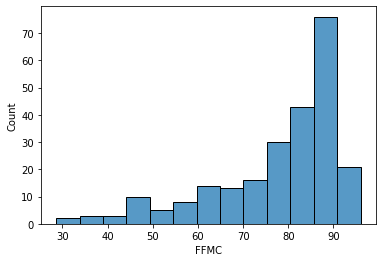

In [152]:
sns.histplot(data=df,x=df_num['FFMC'])

observation:
1. Here we can see that as the FFMC increases the count is also increasing and there is sudden drop after 90's region.

<AxesSubplot:xlabel='DMC', ylabel='Count'>

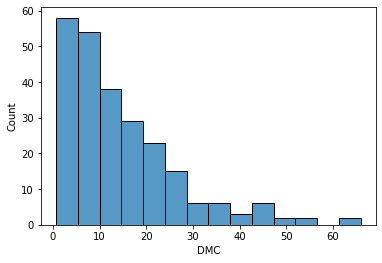

In [153]:
sns.histplot(data=df,x=df_num['DMC'])

observation:
1. Here we can see that DMC at first is peaked and then decreases as we go on.

# Kernel Distributor Estimator 

In [171]:
df_num.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

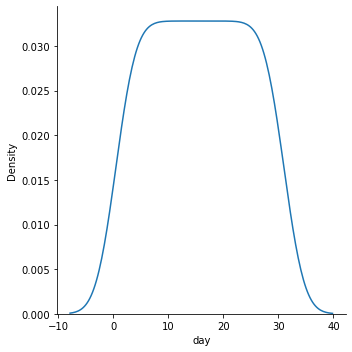

In [172]:
sns.displot(data=df,x=df_num['day'],kind='kde')

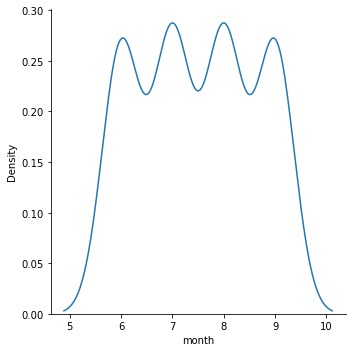

In [173]:
sns.displot(data=df,x=df_num['month'],kind='kde')

In [180]:
df['month'].skew()

0.0

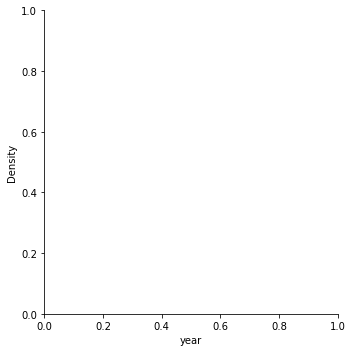

In [174]:
sns.displot(data=df,x=df_num['year'],kind='kde')

In [181]:
df['year'].skew()

0

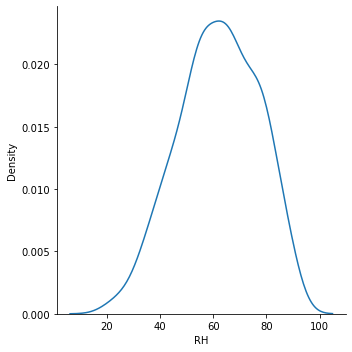

In [175]:
sns.displot(data=df,x=df_num['RH'],kind='kde')

In [182]:
df['RH'].skew()

-0.23796439326918462

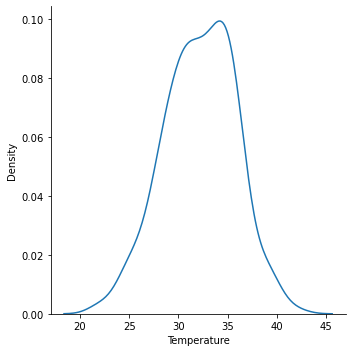

In [183]:
sns.displot(data=df,x=df_num['Temperature'],kind='kde')

In [184]:
df['Temperature'].skew()

-0.19630887951190434

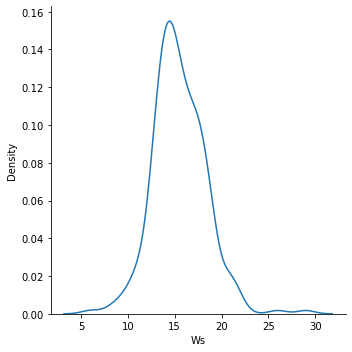

In [176]:
sns.displot(data=df,x=df_num['Ws'],kind='kde')

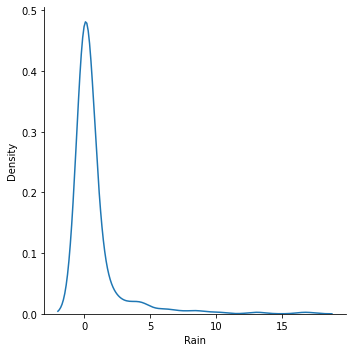

In [177]:
sns.displot(data=df,x=df_num['Rain'],kind='kde')

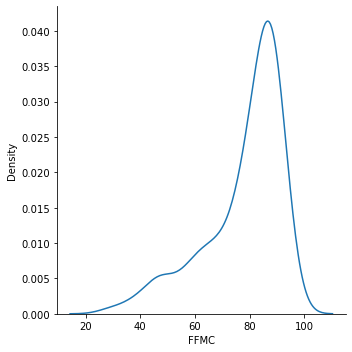

In [178]:
sns.displot(data=df,x=df_num['FFMC'],kind='kde')

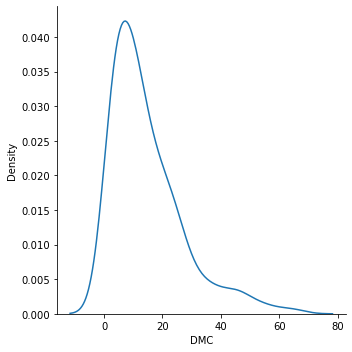

In [179]:
sns.displot(data=df,x=df_num['DMC'],kind='kde')

observation:

**1. Normal distribution**: Day,month,year

**2. Left skew**: FFMC,RH,temperature

**3. Right Skew**: FWI,Rain,DMC